## Bird detection algorithm using YOLO


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import draw_bounding_boxes
from PIL import Image
import cv2

## Set up class for bird detector


In [2]:
class YoloDetector():
    """Bird detector class. Add docstring here"""
    def __init__(self):
        self.yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    
    def detect(self, img):
        """img is a PIL image
        Returns Bool and tuple of boudning boxes - i.e. True, (xmin, ymin, w, h ) or False, None  """
        # Get yolo output as pandas dataframe w/: xmin, ymin, xmax, ymax, confidence, class, name
        yolo_output = self.yolo(img)
        yolo_output_pd = yolo_output.pandas().xyxy[0]
        # Check how many objects were detected and if any of them are birds
        N_obj = len(yolo_output_pd)
        yolo_names = yolo_output_pd["name"]
        if N_obj > 0:
            for n in range(N_obj):
                if yolo_names[n] == "bird":
                    print("BIRD DETECTED!") 
                    # Save this output
                    x1, y1 = (int(yolo_output_pd["xmin"][n]), int(yolo_output_pd["ymin"][n])) 
                    x2, y2 = (int(yolo_output_pd["xmax"][n]), int(yolo_output_pd["ymax"][n]))
                    w = x2 - x1
                    h = y2 - y1
                    return (True, (x1, y1, w, h))
        return (False, None) 
                    

In [3]:
yolo_detector = YoloDetector()

Using cache found in /Users/lauraman/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-21 Python-3.11.3 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Test with dataset
Pick dataset from torchvision datasets, e.g. CIFAR10, Caltech101, Caltech256,

In [4]:
#dataset = torchvision.datasets.CIFAR10(root='./test_datasets', train=False,
#                                       download=True, transform=None)         # Tiny images, yolo doesnt pick up
#dataset = torchvision.datasets.INaturalist(root='./test_datasets', version="2021_valid",
#                                           download=True, transform=None)     # Note large 10 GB dataset
#dataset = torchvision.datasets.Caltech101(root='./test_datasets', download=True, transform=None) 
dataset = torchvision.datasets.Caltech256(root='./test_datasets', download=True, transform=None) 

Files already downloaded and verified


In [66]:
N = len(dataset)
print(N)

30607


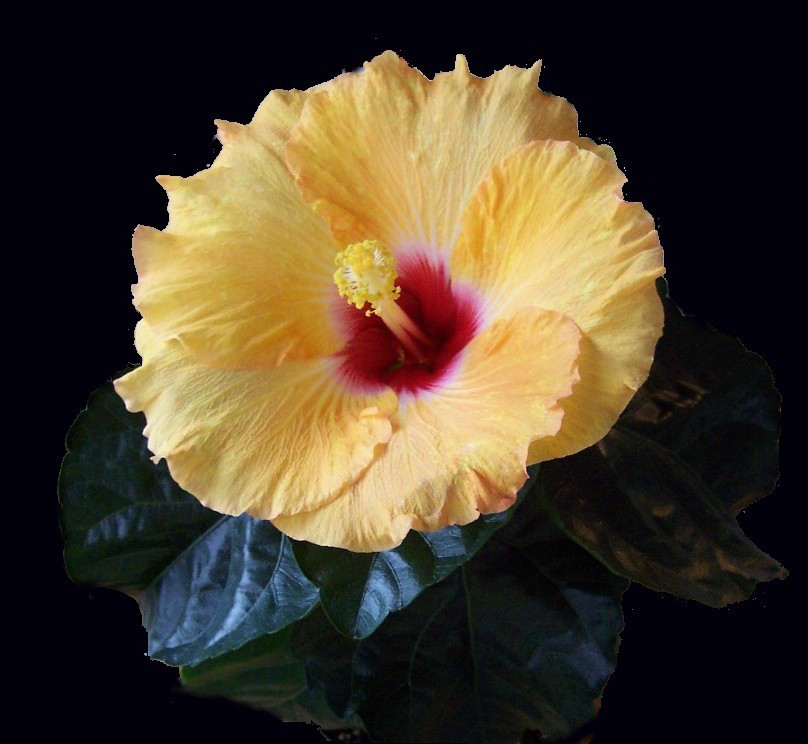

In [86]:
idx = np.random.randint(N)
img = dataset[idx][0]
img

In [87]:
%matplotlib inline

bird_bool, bounding_boxes = yolo_detector.detect(img)

if bird_bool:
    x1, y1, w, h = bounding_boxes
    
    print(x1, y1)
    bird_rect = cv2.rectangle(np.array(img), 
                              (x1, y1), 
                              (x1 + w, y1 + h), color=[0,0,255], thickness=2 )
    plt.imshow(bird_rect)
    plt.show()
    

In [88]:
bird_bool, bounding_boxes

(False, None)